In [65]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
%matplotlib inline

L = [5, 4, 3]

def forward(q, l):
    p0 = np.array([0, 0, 0])
    p1 = p0 + np.array([q[0], 0, 0])
    p2 = p1 + np.array([l[0] * np.cos(q[1]), l[0] * np.sin(q[1]), q[1]])
    p3 = p2 + np.array([l[1] * np.cos(q[1] + q[2]), l[1] * np.sin(q[1] + q[2]), q[2]])
    p4 = p3 + np.array([l[2] * np.cos(q[1] + q[2] + q[3]), l[2] * np.sin(q[1] + q[2] + q[3]), q[3]])

    return np.vstack([p0, p1, p2, p3, p4])


def plotArm(jointPositions):
    fig, ax = plt.subplots()
    ax.plot(jointPositions[:, 0], jointPositions[:, 1], 'b')
    ax.plot(jointPositions[:, 0], jointPositions[:, 1], 'ro')
    ax.set_aspect('equal', 'datalim')


a) Suche $x_A =-2$m, $y_A = 2$m, $\theta_A = -45^{\circ}$

[-1.99999154  2.00000409 -0.78539816]


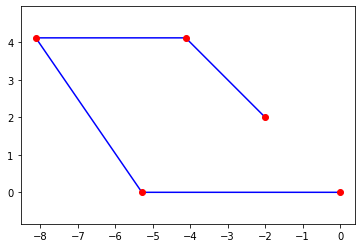

In [66]:
movement_parameter_a = [-5.29029, 2.17269, -2.17269, -pi / 4]
joint_positions_a = forward(movement_parameter_a, L)
plotArm(joint_positions_a)
print(joint_positions_a[-1, :])

b) Suche $x_B =3$m, $y_B = -1$m, $\theta_B = 90^{\circ}$

[ 2.99999651 -0.99999739  1.57079633]


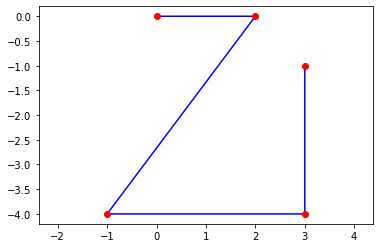

In [67]:
movement_parameter_b = [2, 4.068887, -4.068887, pi / 2]
joint_positions_b = forward(movement_parameter_b, L)
plotArm(joint_positions_b)
print(joint_positions_b[-1, :])

c) Lineare Interpolation der Gelenkparameter von $x_A =-2$m, $y_A = 2$m, $\theta_A = -45^{\circ}$ nach $x_B =3$m, $y_A = -1$m, $\theta_A = 90^{\circ}$

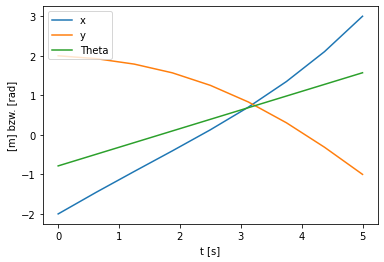

In [68]:
from scipy.interpolate import interp1d

fig, ax = plt.subplots()
t = np.linspace(0, 5, 9)

interpolation = interp1d([0, 5], np.vstack([movement_parameter_a, movement_parameter_b]), axis=0)

values = interpolation(t)
x = []
y = []
thetas = []
for index in range(values.shape[0]):
    value = values[index]
    position = forward(value, L)[-1, :]
    x.append(position[0])
    y.append(position[1])
    thetas.append(position[2])

ax.plot(t, x, label="x")
ax.plot(t, y, label="y")
ax.plot(t, thetas, label="Theta")
ax.set_xlabel("t [s]")
ax.set_ylabel("[m] bzw. [rad]")
ax.legend(loc='upper left')

d) Lineare Interpolation der Endeffektorposition von $x_A =-2$m, $y_A = 2$m, $\theta_A = -45^{\circ}$ nach $x_B =3$m, $y_B = -1$m, $\theta_B = 90^{\circ}$

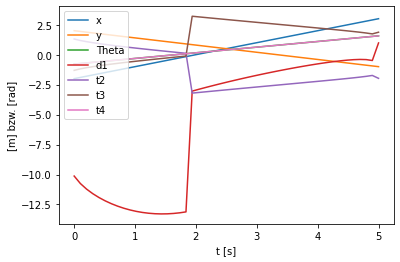

In [69]:
from sympy import symbols, sin, Eq, cos, nsolve, pi

fig, ax = plt.subplots()


def solve(position):
    d1, t2, t3 = symbols("d1 t2 t3")
    def define_equations(t4):
        eq1 = Eq(d1 + cos(t2) * 5 + cos(t2 + t3) * 4 + cos(t2 + t3 + t4) * 4,position[0])
        eq2 = Eq(sin(t2) * 5 + sin(t2 + t3) * 4 + sin(t2 + t3 + t4) * 4,position[1])
        eq3 = Eq(t2 + t3 + t4,position[2])
        return (eq1, eq2, eq3)


    for t4 in np.arange(position[2], position[2] + 2*pi, 0.1):
        try:
            result = nsolve(define_equations(t4), (d1, t2, t3), (1, 1, 1))
            return np.array(result).T[0]
        except:
            continue



interpolation = interp1d([0, 5], np.vstack([[-2, 2, -1 / 4 * pi], [3, -1, pi / 2]]), axis=0)

t = np.linspace(0, 5)
values = interpolation(t)
x = []
y = []
thetas = []
d1s = []
t2s = []
t3s = []
t4s = []
for index in range(values.shape[0]):
    value = values[index]
    solution = solve(value)
    if solution is None:
        print("Error")
        continue

    [d1, t2, t3] = solution
    x.append(value[0])
    y.append(value[1])
    thetas.append(value[2])
    d1s.append(d1)
    t2s.append(t2)
    t3s.append(t3)
    t4s.append(value[2])

ax.plot(t, x, label="x")
ax.plot(t, y, label="y")
ax.plot(t, thetas, label="Theta")
ax.plot(t, d1s, label="d1")
ax.plot(t, t2s, label="t2")
ax.plot(t, t3s, label="t3")
ax.plot(t, t4s, label="t4")
ax.set_xlabel("t [s]")
ax.set_ylabel("[m] bzw. [rad]")
ax.legend(loc='upper left')
# Mir ist bewusst, dass das bisschen overkill ist ...